# <center> Bootcamp MIA </center>
## <center> Aula 8 - Clustering </center>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (12,7)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mulheres-em-ia/bootcamp-mia-2022/main/8.%20Clustering/data/case.csv")

# Exercício 1

Vamos utilizar uma base fictícia contendo dados de visitas de clientes em um site que gostaríamos de segmentar:

* Visitas: quantidade de visitas realizadas durante o mês<br/>
* Tempo: tempo, em segundos, que os usuários ficaram no site

In [4]:
df.head()

,visitas,tempo
0,3,2
1,16,18
2,7,1
3,14,11
4,3,24


In [5]:
df.shape

(3000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   visitas  3000 non-null   int64
 1   tempo    3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitas,3000.0,30.221000,24.852097,0.0,9.0,19.0,56.0,87.0
tempo,3000.0,41.165333,24.983863,0.0,19.0,42.0,62.0,104.0


In [8]:
df.loc[df["visitas"] == 0]

,visitas,tempo
228,0,12
234,0,2
267,0,8
288,0,2
289,0,22
389,0,33
401,0,4
409,0,8
424,0,22
429,0,2


Estranho isso ... como pode uma pessoa nunca ter visitado o site e ter o valor de quanto tempo ficou no site

**Vamos visualizar a distribuição desses dados?**



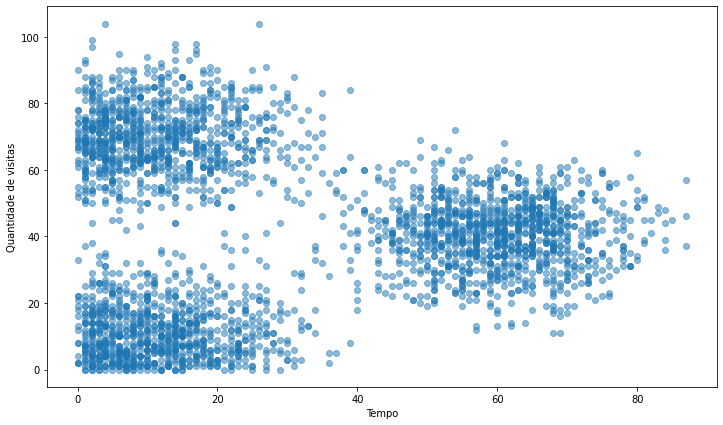

In [9]:
plt.scatter(df.visitas, df.tempo, alpha = 0.5)
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
plt.show()

IMPORTANTE

Como os agrupamentos são definidos com base em uma medida de distância, primeiro precisamos normalizar os dados!

In [10]:
# Importar o StandScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

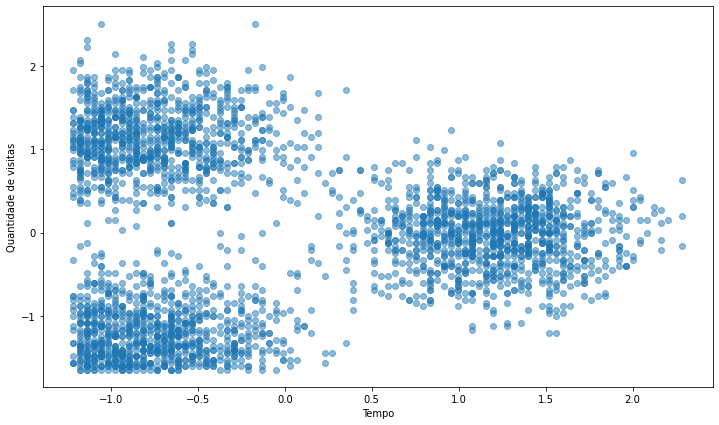

In [11]:
plt.scatter(df.visitas, df.tempo, alpha = 0.5)
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
plt.show()

Voltando ao K-means...

O Sklearn já conta com uma implementação do K-means. Podemos importá-la:

In [12]:
# Importar o k-means
from sklearn.cluster import KMeans

In [13]:
# cria uma instância do K-means
# n_clusters default = 8
kmeans = KMeans()
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

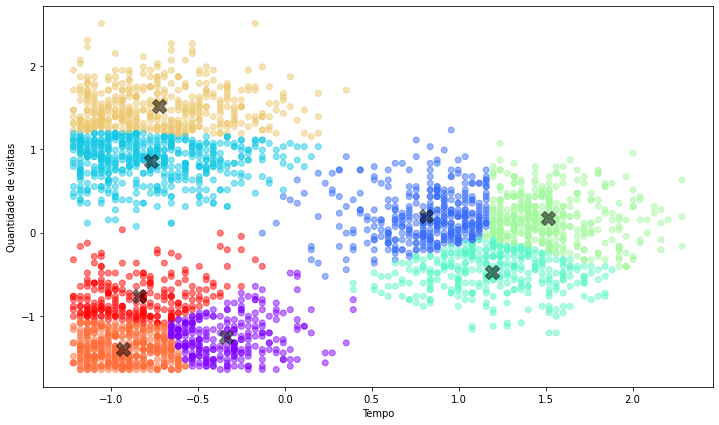

In [14]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha = 0.5, cmap = "rainbow")
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
# plota os centroides também 
plt.scatter(centroides[:,0], centroides[:,1], c='black', marker="X", s=200, alpha = 0.5)
plt.show()

In [15]:
# TODO
# Rodar o K-means definindo o número de clusters como 50

Altere o número de clusters e rode o algoritmo de novo. Vamos ver o que acontece :D

Não se esqueça de adicionar uma seed!

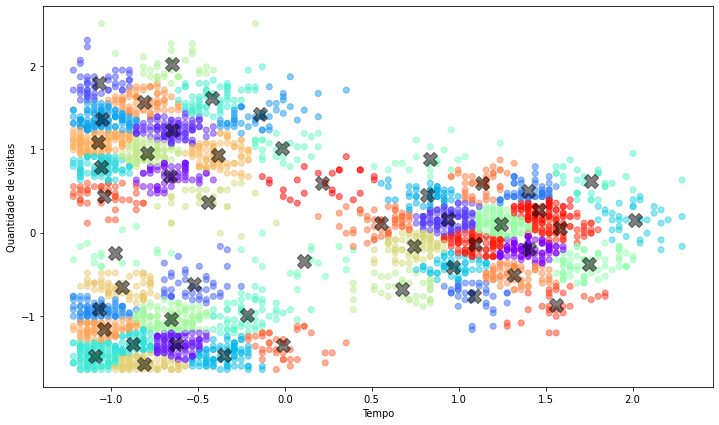

In [16]:
# Sem o seed
kmeans = KMeans(n_clusters=50) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

In [17]:
# Com o seed
kmeans = KMeans(n_clusters=50, random_state = 42)
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

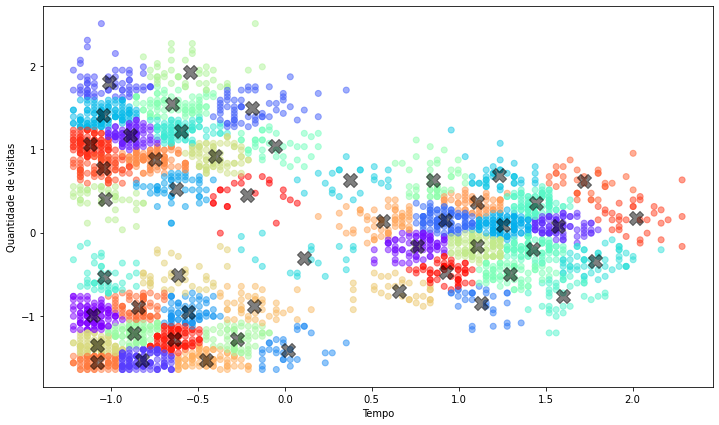

In [18]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha = 0.5, cmap = "rainbow")
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
# plota os centroides também 
plt.scatter(centroides[:,0], centroides[:,1], c='black', marker="X", s=200, alpha = 0.5)
plt.show()

In [19]:
# TODO
# Rodar o K-means escolhendo o número de clusters que você acha que faz sentido

In [46]:
# cria uma instância do K-means

kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

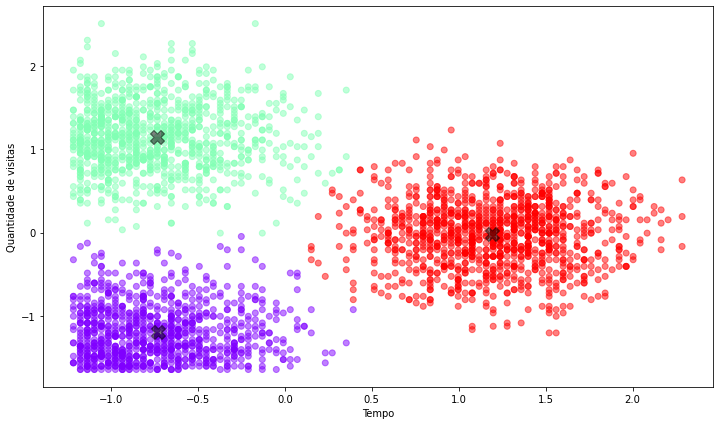

In [21]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha = 0.5, cmap = "rainbow")
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
# plota os centroides também 
plt.scatter(centroides[:,0], centroides[:,1], c='black', marker="X", s=200, alpha = 0.5)
plt.show()

Para escolhermos o número de clusters, observamos o gráfico do cotovelo com as inércias e escolhemos o ponto no qual a inércia começa a ficar mais plana e formar um "cotovelo"

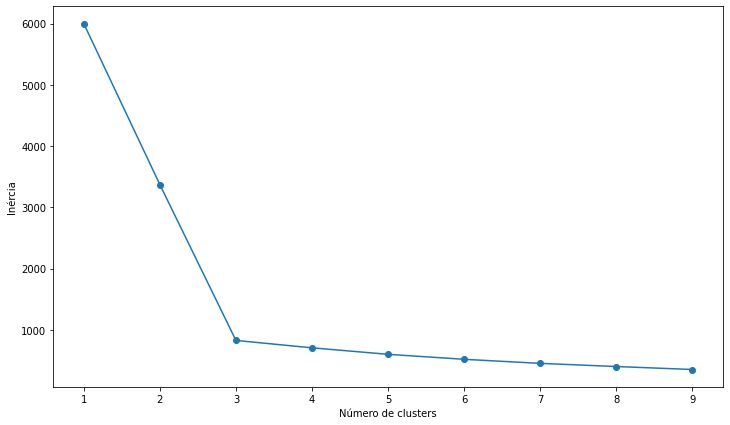

In [22]:
# Quantidade de clusters que serão testados 
k = list(range(1,10))

# Armazena as inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido 
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=8)
  kmeans.fit(df)
  inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias 
plt.plot(k,inercia, '-o')
plt.xlabel(r"Número de clusters")
plt.ylabel("Inércia")
plt.show()

# Exercício 2

Agora vamos fazer mais uma segmentação de clientes com o K-Means, dessa vez com mais features. O dataset que iremos utilizar é uma adaptação deste aqui presente no Kaggle.

Dessa vez, vamos supor que estamos envolvidos em um projeto de um e-commerce que tem como objetivo segmentar e entender seus clientes para realizar campanhas de marketing.

In [23]:
# Importar o Dataset
segmentation = pd.read_csv("https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/4.1%20Clustering/data/customer_segmentation.csv")

In [24]:
segmentation.head()

,id,tem_cartao,idade,renda,score
0,1,Não,19,1500,39
1,2,Não,21,1500,81
2,3,Sim,20,1600,6
3,4,Sim,23,1600,77
4,5,Sim,31,1700,40


Esse conjunto de dados possui 5 campos:

* **id**: código identificador do cliente
* **tem_cartao**: indica se o cliente tem cartão de crédito do e-commerce ou não
* **idade**: idade do cliente
* **renda**: renda mensal do cliente, em reais
* **score**: score indicando o gasto do cliente. Quanto maior, mais o cliente gasta no e-commerce
Observando os dados acima, quais pré-processamentos vocês acham que serão necessários antes de realizarmos o agrupamento?

**1° - Remoção do identificador**

O conjunto de dados contém o id do cliente que não iremos utilizar para a segmentação. Precisamos remover antes de realizar o agrupamento:

In [25]:
segmentation.drop(columns="id", inplace=True)

**2° - Lidar com feature categórica**

Temos mais um ponto para resolver antes do agrupamento: a feature tem_cartao é categórica e o k-means só lida com dados numéricos.

O que podemos fazer para lidar com variáveis categóricas então?

* Feature engineering (One-hot enconding, Label Encoder, etc.)
* Utilizar outro algoritmo que permita usar esse tipo de variável
No nosso caso, vamos utilizar o LabelEncoder:

In [26]:
# Importar o LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
segmentation["tem_cartao"].value_counts()

Sim    112
Não     88
Name: tem_cartao, dtype: int64

In [28]:
label_encoder = LabelEncoder()
segmentation["tem_cartao"] = label_encoder.fit_transform(segmentation.tem_cartao.values)

In [29]:
segmentation["tem_cartao"].value_counts()

1    112
0     88
Name: tem_cartao, dtype: int64

**3° - Normalizar os dados**

As escalas das features são diferentes, então precisamos normalizar os dados:

In [30]:
scaler = StandardScaler()
scaled_segmentation = pd.DataFrame(scaler.fit_transform(segmentation),columns = segmentation.columns)

Agora sim podemos aplicar o K-means \o/

Primeiro, vamos utilizar a regra do cotovelo para escolher o número de clusters:

In [31]:
# TODO
# Fazer a curva do cotovelo aqui para escolhermos o número de clusters

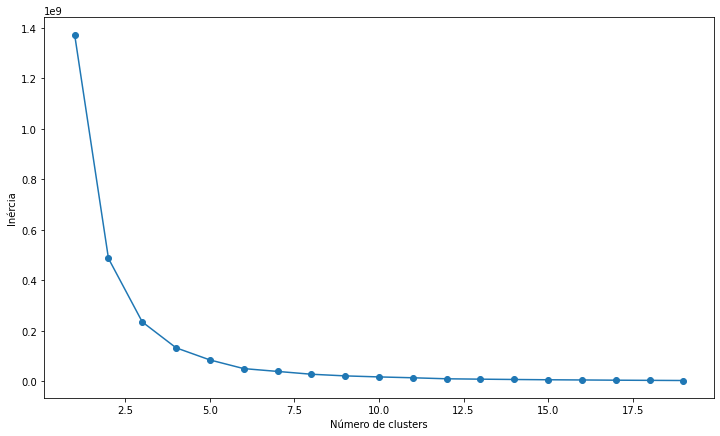

In [32]:
# Quantidade de clusters que serão testados 
k = list(range(1,20))

# Armazena as inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido 
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=8)
  kmeans.fit(segmentation)
  inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias 
plt.plot(k,inercia, '-o')
plt.xlabel(r"Número de clusters")
plt.ylabel("Inércia")
plt.show()

Com base no gráfico acima, podemos escolher a quantidade de clusters que serão criados:



In [33]:
# TODO
# Rodar o k-means no nosso conjunto de dados

In [34]:
# cria uma instância do K-means
# n_clusters default = 8
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(segmentation)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(segmentation)

Após o agrupamento, precisamos reverter a normalização para podermos interpretar os clusters formados!



In [35]:
clusters = kmeans.fit_predict(scaled_segmentation)

In [36]:
original_segmentation = pd.DataFrame(scaler.inverse_transform(scaled_segmentation), columns=segmentation.columns)

Como utilizamos 4 features para criação dos clusters, não podemos visualizá-las como no 1° exercício. Podemos utilizar o pairplot para tentar interpretar os clusters:



In [37]:
original_segmentation['cluster'] = clusters

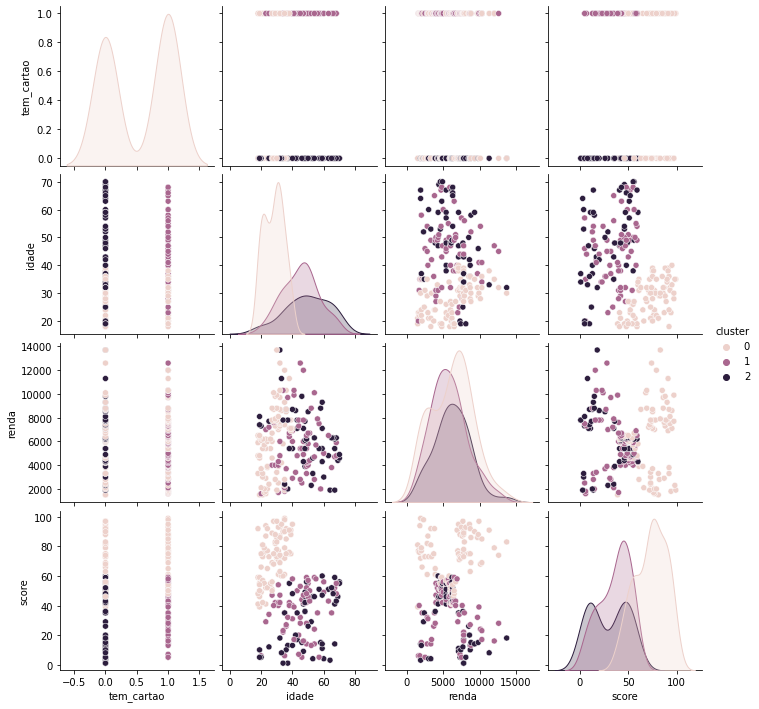

In [38]:
sns.pairplot(original_segmentation, hue = 'cluster');


# Exemplo - Compressão de Imagens 

Vamos agora ver um exemplo de aplicação do K-Means trabalhando com imagens :D



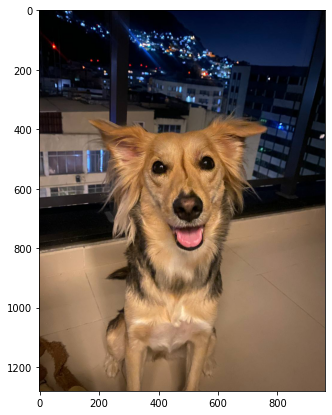

In [51]:
# Importar a imagem
img = plt.imread("/content/photo_2022-08-27_09-33-36.jpg")
plt.imshow(img)
plt.show()

In [52]:
# dimensão da imagem
img.shape

(1280, 960, 3)

In [54]:
# redimensionar a imagem para termos somente duas dimensões de dados
x, y, z = img.shape
img_2d = img.reshape(x*y, z)
img_2d.shape

(1228800, 3)

In [59]:
# TODO
# Escolha um número de clusters e use o K-means para realizar os agrupamentos
kmeans_img = KMeans(n_clusters=9, random_state=8)
kmeans_img.fit(img_2d)

cluster_centers = kmeans_img.cluster_centers_
cluster_labels = kmeans_img.labels_

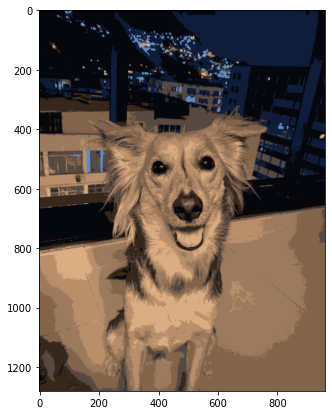

In [60]:
# Plotar a imagem após a compressão
plt.imshow(cluster_centers[cluster_labels].
           reshape(x, y, z).astype(int))
plt.show()

# Agrupamento Hierárquico Aglomerativo


## Exercício 3
Vamos utilizar o mesmo conjunto de dados utilizado no segundo exercício do K-means para realizar um agrupamento hierárquico aglomerativo. Para esse agrupamento, precisaremos importar o dendograma do Scipy.

O sklearn também possui um módulo para realizar um agrupamento hierárquico aglomerativo, mas é complicado visualizar o dendograma com ele, então vamos ficar com o scipy mesmo.

In [39]:
# importar os módulos dendogram e linkage
from scipy.cluster.hierarchy import dendrogram, linkage

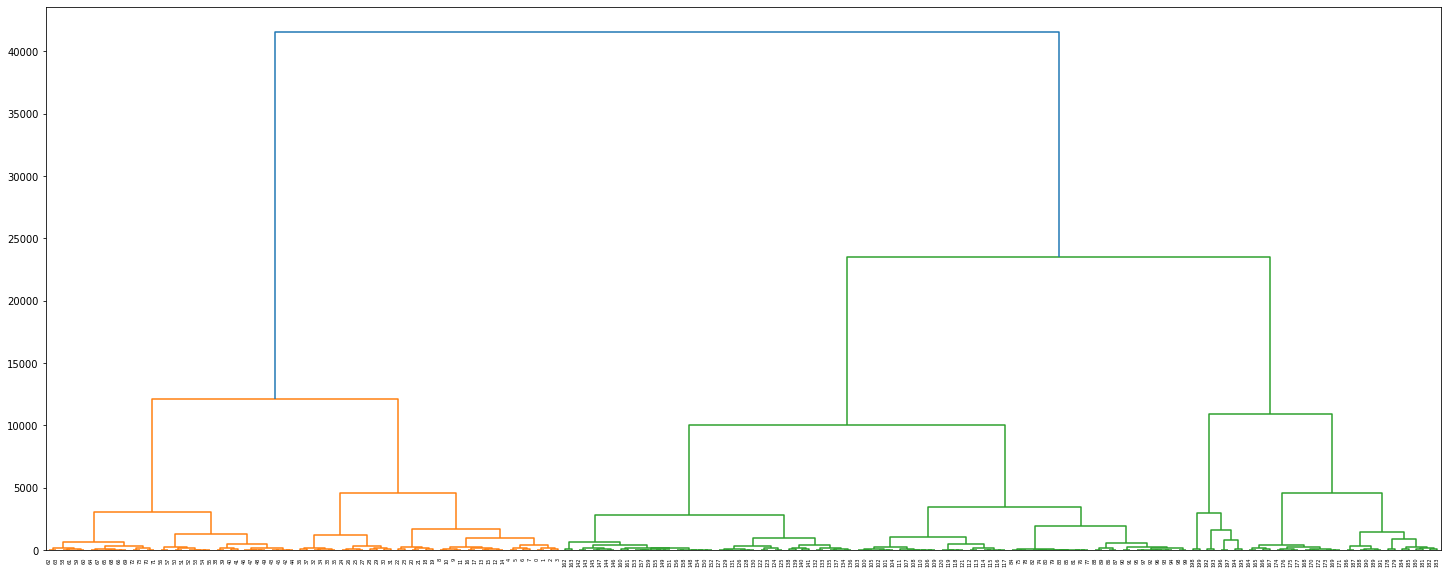

In [40]:
# TODO
# Usar o método linkage para fazer o agrupamento hierárquico
h_cluster = linkage(segmentation, 'ward')


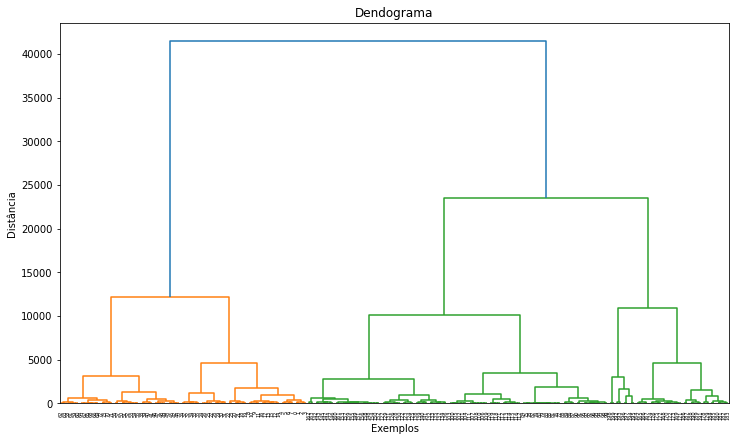

In [48]:
# TODO
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
# Chamar o dendrograma aqui
dendrogram(h_cluster)
plt.show()

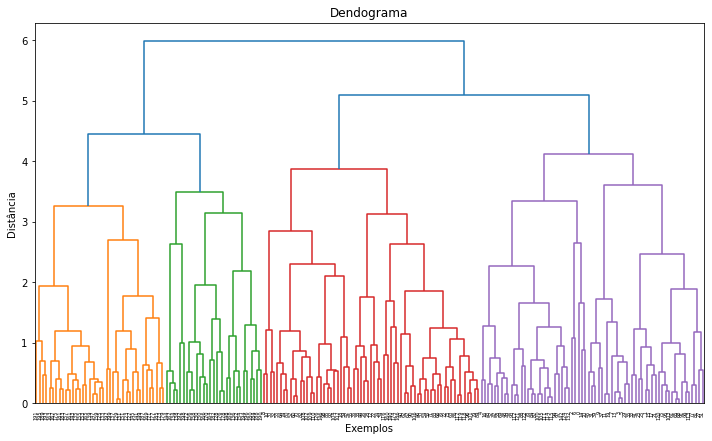

In [49]:
h_cluster2 = linkage(scaled_segmentation, method='complete', metric='euclidean')

plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster2)
plt.show()


# Por densidade: DBSCAN


## Exercício 4
Vamos utilizar novamente o conjunto do primeiro exercício com o DBSCAN, que vamos importar do sklearn:

In [42]:
# Importar o DBSCAN
from sklearn.cluster import DBSCAN

In [43]:
# TODO
# Escolha um epsilon e um minPts
dbscan = DBSCAN(eps=.1, min_samples=8)
# salvar os clusters atribuídos para cada exemplo
clusters = dbscan.fit_predict(df)

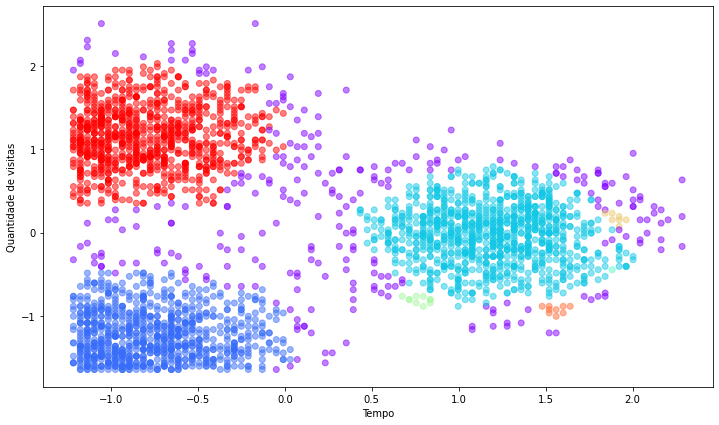

In [44]:
# plota os clusters encontrados 
plt.scatter(df.visitas, df.tempo, c=clusters, alpha=0.5, cmap='rainbow')
plt.xlabel("Tempo")
plt.ylabel("Quantidade de visitas")
plt.show()